<a href="https://colab.research.google.com/github/kalpitbansal31/Analysis-of-Customer-for-Financial-Loan/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan status prediction**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

**Loading the dataset**

In [ ]:
dataset=pd.read_csv("Loan_Prediction.csv")

**Printing the first 5 rows of the dataframe**

In [ ]:
 dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
dataset.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

**Tells the number of rows and columns**

In [ ]:
dataset.shape

(614, 13)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Tells about the statistical data of the numerical columns**

In [ ]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000




```
# This is formatted as code
```

**Checking Null Values In Dataset**

In [ ]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Handling the missing values by filling them**

In [ ]:

dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)
dataset['Married'].fillna(dataset['Married'].mode()[0],inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0],inplace=True)
dataset.LoanAmount = dataset.LoanAmount.fillna(dataset.LoanAmount.mean())
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0],inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0],inplace=True)

**Checking for Null Values after Handling them**

In [ ]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Type of dataset**

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

**Tells how credit history affect other applicants**

In [ ]:
pd.crosstab(dataset['Credit_History'],dataset['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,110,415,525
All,192,422,614


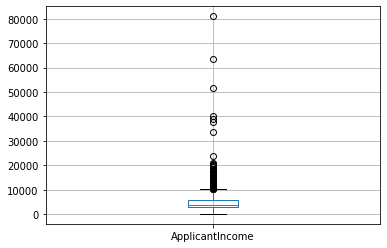

In [ ]:
dataset.boxplot(column='ApplicantIncome')

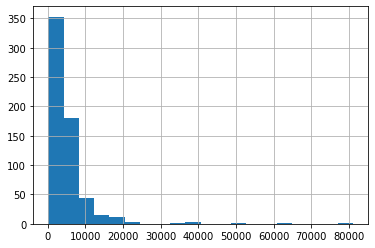

In [ ]:
dataset['ApplicantIncome'].hist(bins=20)

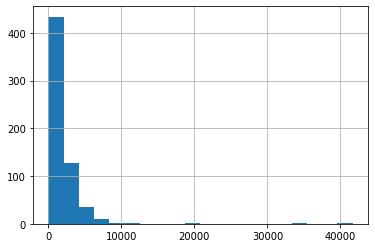

In [ ]:
dataset['CoapplicantIncome'].hist(bins=20)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


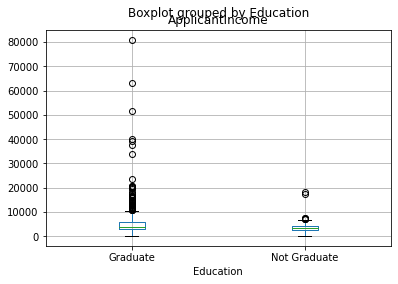

In [ ]:
dataset.boxplot(column='ApplicantIncome', by='Education')

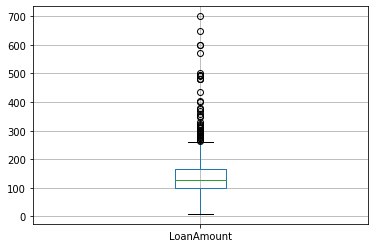

In [ ]:
dataset.boxplot(column='LoanAmount')

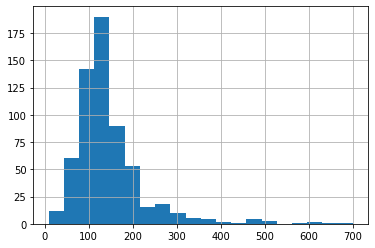

In [ ]:
dataset['LoanAmount'].hist(bins=20)

In [ ]:
dataset['TotalIncome']=dataset['ApplicantIncome'] + dataset['CoapplicantIncome']
dataset['TotalIncome_log']=np.log(dataset['TotalIncome'])

In [ ]:
from typing import ValuesView
x=dataset.iloc[:,np.r_[1:5,9:11,13:15]].values
y=dataset.iloc[:,12].values

In [ ]:
x

array([['Male', 'No', '0', ..., 1.0, 5849.0, 8.674025985443025],
       ['Male', 'Yes', '1', ..., 1.0, 6091.0, 8.714567550836485],
       ['Male', 'Yes', '0', ..., 1.0, 3000.0, 8.006367567650246],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 8312.0, 9.025455532779063],
       ['Male', 'Yes', '2', ..., 1.0, 7583.0, 8.933664178700935],
       ['Female', 'No', '0', ..., 0.0, 4583.0, 8.430109084509125]],
      dtype=object)

In [ ]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

**Splitting of dataset**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0) 

In [ ]:
print(x_train)

[['Male' 'Yes' '0' ... 1.0 5858.0 8.675563527387679]
 ['Male' 'No' '1' ... 1.0 11250.0 9.328123407632566]
 ['Male' 'Yes' '0' ... 0.0 5681.0 8.644882552557126]
 ...
 ['Male' 'Yes' '3+' ... 1.0 8334.0 9.0280988119824]
 ['Male' 'Yes' '0' ... 1.0 6033.0 8.704999678440762]
 ['Female' 'Yes' '0' ... 1.0 6486.0 8.777401286867264]]


**Preprocessing Steps**

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()

In [ ]:
for i in range(0,5):
  x_train[:,i]=labelencoder_x.fit_transform(x_train[:,i])

NameError: ignored

In [ ]:
x_train[:,7]=labelencoder_x.fit_transform(x_train[:,7])

In [ ]:
x_train

array([[1, 1, 0, ..., 1.0, 5858.0, 267],
       [1, 0, 1, ..., 1.0, 11250.0, 407],
       [1, 1, 0, ..., 0.0, 5681.0, 249],
       ...,
       [1, 1, 3, ..., 1.0, 8334.0, 363],
       [1, 1, 0, ..., 1.0, 6033.0, 273],
       [0, 1, 0, ..., 1.0, 6486.0, 301]], dtype=object)

In [ ]:
labelencoder_y=LabelEncoder()
y_train=labelencoder_y.fit_transform(y_train)

In [ ]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [ ]:
for i in range(0,5):
  x_test[:,i]=labelencoder_x.fit_transform(x_test[:,i])

In [ ]:
x_test[:,7]=labelencoder_x.fit_transform(x_test[:,7])

In [ ]:
labelencoder_y=LabelEncoder()
y_test=labelencoder_y.fit_transform(y_test)

In [ ]:
x_test

array([[1, 0, 0, 0, 5, 1.0, 7085.0, 85],
       [0, 0, 0, 0, 5, 1.0, 4230.0, 28],
       [1, 1, 0, 0, 5, 1.0, 10039.0, 104],
       [1, 1, 0, 0, 5, 1.0, 6784.0, 80],
       [1, 1, 2, 0, 5, 1.0, 3875.0, 22],
       [1, 1, 0, 1, 3, 0.0, 6058.0, 70],
       [1, 1, 3, 0, 3, 1.0, 6417.0, 77],
       [1, 0, 0, 0, 5, 1.0, 12876.0, 114],
       [1, 0, 0, 0, 5, 0.0, 5124.0, 53],
       [1, 1, 0, 0, 5, 1.0, 5233.0, 55],
       [0, 0, 0, 0, 5, 1.0, 2917.0, 4],
       [1, 1, 1, 0, 5, 1.0, 2895.0, 2],
       [0, 0, 0, 0, 5, 1.0, 8333.0, 96],
       [1, 1, 2, 0, 5, 1.0, 8667.0, 97],
       [1, 1, 0, 0, 5, 1.0, 14880.0, 117],
       [1, 1, 1, 0, 5, 1.0, 3875.0, 22],
       [1, 0, 1, 1, 5, 1.0, 4311.0, 32],
       [1, 0, 0, 1, 5, 1.0, 3946.0, 25],
       [0, 0, 0, 0, 5, 1.0, 2500.0, 1],
       [1, 1, 0, 1, 5, 0.0, 4787.0, 44],
       [0, 1, 0, 0, 5, 0.0, 6085.0, 71],
       [1, 1, 0, 0, 5, 1.0, 4765.0, 43],
       [1, 1, 2, 0, 5, 1.0, 7550.0, 91],
       [1, 1, 2, 0, 5, 1.0, 11500.0, 111],
       [1, 

In [ ]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)                  

In [ ]:
print(x_train)

[[ 0.47374983  0.71143163 -0.76304669 ...  0.41790088 -0.18578759
   0.29186348]
 [ 0.47374983 -1.40561644  0.22549137 ...  0.41790088  0.59265746
   1.36113256]
 [ 0.47374983  0.71143163 -0.76304669 ... -2.39291191 -0.21134115
   0.15438603]
 ...
 [ 0.47374983  0.71143163  2.2025675  ...  0.41790088  0.17167345
   1.02507656]
 [ 0.47374983  0.71143163 -0.76304669 ...  0.41790088 -0.16052278
   0.3376893 ]
 [-2.11081869  0.71143163 -0.76304669 ...  0.41790088 -0.095123
   0.55154312]]


In [ ]:
print(x_test)

[[ 0.46671381 -1.25       -0.64059361 -0.51772699  0.29935278  0.3866946
   0.13465755  0.73262333]
 [-2.14264068 -1.25       -0.64059361 -0.51772699  0.29935278  0.3866946
  -0.57724973 -0.89540272]
 [ 0.46671381  0.8        -0.64059361 -0.51772699  0.29935278  0.3866946
   0.87125093  1.27529868]
 [ 0.46671381  0.8        -0.64059361 -0.51772699  0.29935278  0.3866946
   0.05960182  0.58981403]
 [ 0.46671381  0.8         1.37974009 -0.51772699  0.29935278  0.3866946
  -0.6657706  -1.06677388]
 [ 0.46671381  0.8        -0.64059361  1.93151993 -2.07615636 -2.58602011
  -0.12142959  0.30419542]
 [ 0.46671381  0.8         2.38990694 -0.51772699 -2.07615636  0.3866946
  -0.0319113   0.50412845]
 [ 0.46671381 -1.25       -0.64059361 -0.51772699  0.29935278  0.3866946
   1.57866982  1.56091729]
 [ 0.46671381 -1.25       -0.64059361 -0.51772699  0.29935278 -2.58602011
  -0.35432675 -0.1813562 ]
 [ 0.46671381  0.8        -0.64059361 -0.51772699  0.29935278  0.3866946
  -0.32714711 -0.12423248

**Accuracy-Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTClassifier.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred=DTClassifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
from sklearn import metrics
print('The accuracy of decision tree is: ',metrics.accuracy_score(y_pred,y_test)*100)

The accuracy of decision tree is:  61.78861788617886


In [ ]:
print('The recall using decision tree is:',metrics.recall_score(y_pred,y_test)*100)

The recall using decision tree is: 80.28169014084507


In [ ]:
print('The precision using decision tree is:',metrics.precision_score(y_pred,y_test)*100)

The precision using decision tree is: 63.33333333333333


In [ ]:
print('The f-score using decision tree is:',metrics.f1_score(y_pred,y_test)*100)

The f-score using decision tree is: 70.80745341614907


In [ ]:
print('The confusion matrix of decision tree is:',metrics.confusion_matrix(y_pred,y_test))


The confusion matrix of decision tree is: [[19 33]
 [14 57]]


**Accuracy-Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=NBClassifier.predict(x_test)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
print('The accuracy of Naive Bayes is: ',metrics.accuracy_score(y_pred,y_test)*100)

The accuracy of Naive Bayes is:  83.73983739837398


In [ ]:
print('The recall using Naive Bayes is:',metrics.recall_score(y_pred,y_test)*100)

The recall using Naive Bayes is: 83.01886792452831


In [ ]:
print('The precision using Niave Bayes is:',metrics.precision_score(y_pred,y_test)*100)

The precision using Niave Bayes is: 97.77777777777777


In [ ]:
print('The f-score using Niave Bayes is:',metrics.f1_score(y_pred,y_test)*100)

The f-score using Niave Bayes is: 89.79591836734696


In [ ]:
print('The confusion matrix of Niave Bayes is:',metrics.confusion_matrix(y_pred,y_test))


The confusion matrix of Niave Bayes is: [[15  2]
 [18 88]]


**Accuracy- Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred=classifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
print ("The accuracy of Logistic Regression is: ", metrics.accuracy_score(y_test, y_pred)*100)

The accuracy of Logistic Regression is:  82.92682926829268


In [ ]:
print('The recall using Logistic Regression is:',metrics.recall_score(y_pred,y_test)*100)

The recall using Logistic Regression is: 82.2429906542056


In [ ]:
print('The precision using Logistic Regression is:',metrics.precision_score(y_pred,y_test)*100)

The precision using Logistic Regression is: 97.77777777777777


In [ ]:
print('The f-score using Logistic Regression is:',metrics.f1_score(y_pred,y_test)*100)

The f-score using Logistic Regression is: 89.34010152284264


In [ ]:
print('The confusion matrix of Logistic Regression is:',metrics.confusion_matrix(y_pred,y_test))


The confusion matrix of Logistic Regression is: [[14  2]
 [19 88]]


**Accuracy-Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


In [ ]:
print("The accuracy of Random Forest is: ", metrics.accuracy_score(y_test, y_pred)*100)

The accuracy of Random Forest is:  78.04878048780488


In [ ]:
print('The recall using Random Forest is:',metrics.recall_score(y_pred,y_test)*100)

The recall using Random Forest is: 83.15789473684211


In [ ]:
print('The precision using Random Forest is:',metrics.precision_score(y_pred,y_test)*100)

The precision using Random Forest is: 87.77777777777777


In [ ]:
print('The f-score using Random Forest is:',metrics.f1_score(y_pred,y_test)*100)

The f-score using Random Forest is: 85.4054054054054


In [ ]:
print('The confusion matrix of Random Forest is:',metrics.confusion_matrix(y_pred,y_test))


The confusion matrix of Random Forest is: [[17 11]
 [16 79]]


**Testing the data**

In [ ]:
testdata=pd.read_csv("Loan_Prediction.csv")
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
testdata.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
testdata['Gender'].fillna(testdata['Gender'].mode()[0],inplace=True)
testdata['Married'].fillna(testdata['Married'].mode()[0],inplace=True)
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0],inplace=True)
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0],inplace=True)

In [ ]:
testdata.LoanAmount = testdata.LoanAmount.fillna(testdata.LoanAmount.mean())
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mode()[0],inplace=True)
testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0],inplace=True)

In [ ]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

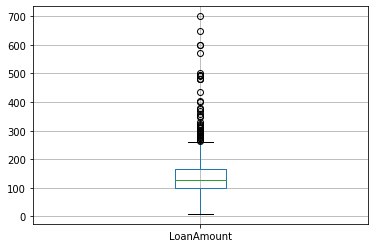

In [ ]:
testdata.boxplot(column='LoanAmount')

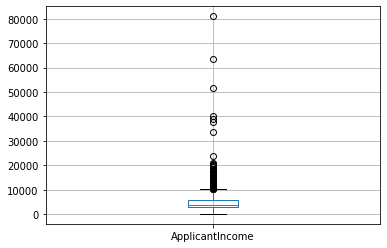

In [ ]:
testdata.boxplot(column='ApplicantIncome')

In [ ]:
testdata['TotalIncome']=testdata['ApplicantIncome'] + testdata['CoapplicantIncome']
testdata['TotalIncome_log']=np.log(testdata['TotalIncome'])

In [ ]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515


In [ ]:
test=testdata.iloc[:,np.r_[1:5,9:11,13:15]].values

In [ ]:
for i in range(0,5):
    test[:,i]=labelencoder_x.fit_transform(test[:,i])

In [ ]:
test[:,7]=labelencoder_x.fit_transform(test[:,7])

In [ ]:
test

array([[1, 0, 0, ..., 1.0, 5849.0, 320],
       [1, 1, 1, ..., 1.0, 6091.0, 333],
       [1, 1, 0, ..., 1.0, 3000.0, 42],
       ...,
       [1, 1, 1, ..., 1.0, 8312.0, 436],
       [1, 1, 2, ..., 1.0, 7583.0, 416],
       [0, 0, 0, ..., 0.0, 4583.0, 185]], dtype=object)

In [ ]:
test=ss.fit_transform(test)

In [ ]:
NBClassifier.fit(x_train,y_train)
y_pred=NBClassifier.predict(test)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,

# **THANK YOU**